<a href="https://colab.research.google.com/github/Gaurav-Yaduvanshi/Capstone-1-Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis_Individual_Notebook_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Almabetter/Module 1 Python for Data Science/EDA Capstone Projects/Hotel Bookings/'
df = pd.read_csv( path + 'Hotel Bookings.csv')

In [4]:
df.shape

(119390, 32)

In [5]:
# Check the datatype of each columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [7]:
# Checking the missing data
df.isna().sum() 

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [8]:
# Dropping the columns with missing values
df = df.drop(['agent','company'],axis=1)

In [9]:
# Dropping the 488 missing values of country and 4 missing values of children columnns
df = df.dropna()

In [10]:
# Check missing values
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [11]:
# Now Dataframe has no missing values 

In [12]:
# Statistical Analysis
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [13]:
# Overview
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01


In [14]:
df.tail(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.4,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,A,0,No Deposit,0,Transient,151.2,0,2,Check-Out,2017-09-07


In [132]:
# Checking hotels
df['hotel'].value_counts()

City Hotel      79302
Resort Hotel    39596
Name: hotel, dtype: int64

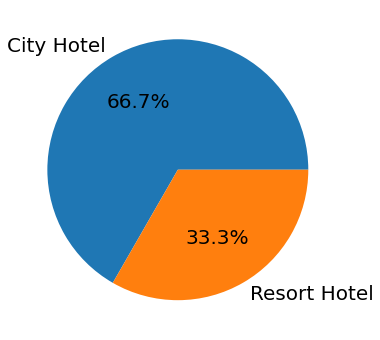

In [16]:
# % of records(resort hotel and city hotel)

labels = df['hotel'].value_counts().index
sizes = df['hotel'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(sizes,labels=labels,autopct='%0.1f%%',textprops={'fontsize': 20})
plt.show()

In [17]:
# From above pie chart We can see that majority of the people preferred City hotel over Resort hotel

In [18]:
# No. of cancel and not canceled  

In [133]:
df['is_canceled'].value_counts()

not_canceled    74745
canceled        44153
Name: is_canceled, dtype: int64

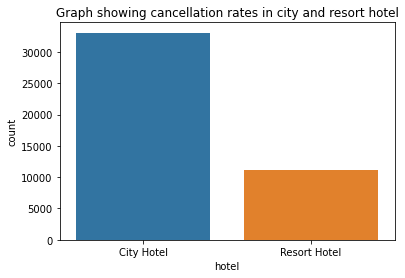

In [20]:
type_of_hotel_canceled = df[rate]
canceled_hotel = type_of_hotel_canceled[type_of_hotel_canceled['is_canceled'] == 'canceled'].groupby(['hotel']).size().reset_index(name = 'count')
sns.barplot(data = canceled_hotel, x = 'hotel', y = 'count').set_title('Graph showing cancellation rates in city and resort hotel')
plt.show()

In [21]:
# City hotels have the highest cancellation rates, this can be verified by the fact that city hotels have higher booking rate than resort hotels

In [22]:
# Arrivals

In [72]:
df['arrival_date_year'].value_counts()

2016    56435
2017    40604
2015    21859
Name: arrival_date_year, dtype: int64

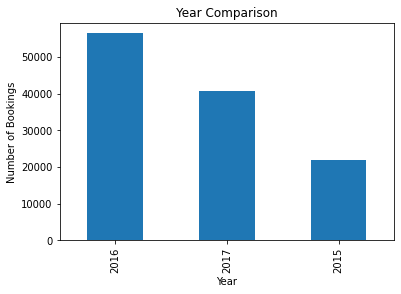

Text(0.5, 0, 'Year')

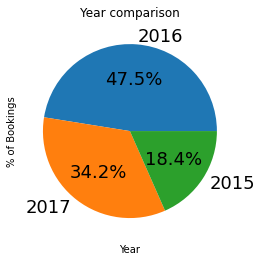

In [23]:
# Number of Bookings
count = df["arrival_date_year"].value_counts()
count.plot(kind='bar')
plt.title('Year Comparison')
plt.ylabel('Number of Bookings')
plt.xlabel('Year')
plt.show()

percent = df["arrival_date_year"].value_counts()
percent.plot.pie(fontsize= 18,autopct="%.1f%%")
plt.title('Year comparison')
plt.ylabel('% of Bookings')
plt.xlabel('Year')

Text(0.5, 1.0, 'Number of Monthly Bookings')

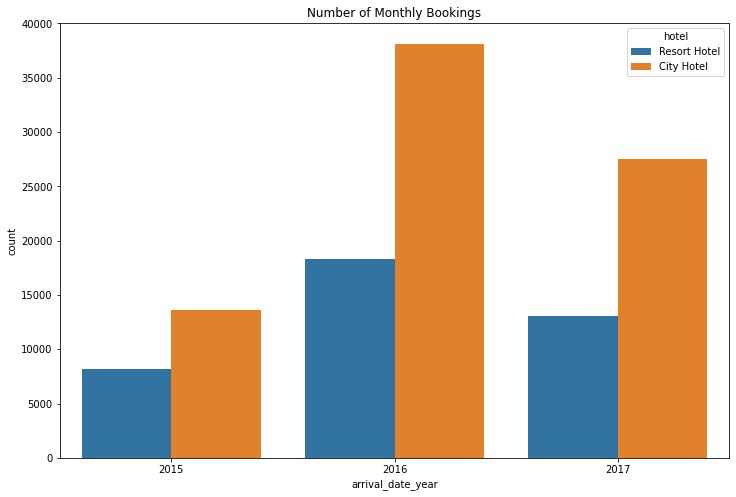

In [135]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.countplot(x = 'arrival_date_year',hue = 'hotel',data=df).set_title('Number of Monthly Bookings')

In [24]:
# 2016 has more number of bookings than 2015 and 2017.
# we can see that after 2015 bookings increased in 2016 but than decreased in 2017.

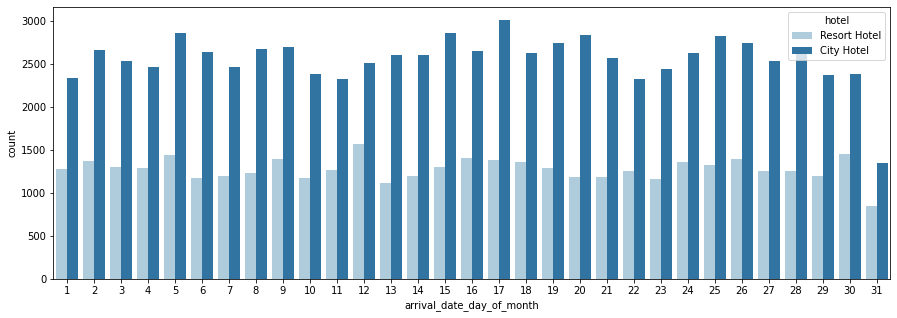

In [25]:
plt.figure(figsize=(15,5))
sns.countplot(data = df, x = 'arrival_date_day_of_month',hue='hotel',  palette='Paired')
plt.show()

In [26]:
# From above we can see that month ending has the least number of arrivals in both resort and city hotels

In [78]:
df['arrival_date_month'].value_counts()

August       13852
July         12628
May          11779
October      11095
April        11045
June         10927
September    10467
March         9739
February      8012
November      6752
December      6728
January       5874
Name: arrival_date_month, dtype: int64

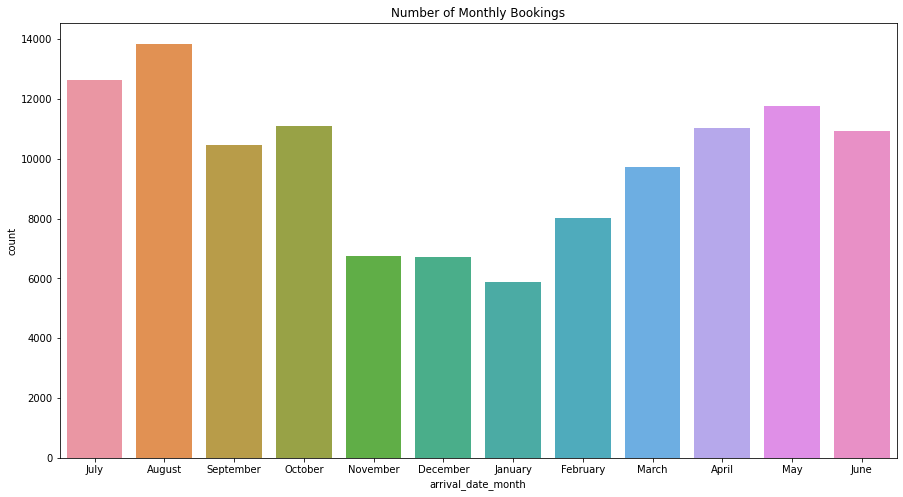

Text(0.5, 1.0, 'Number of Monthly Bookings')

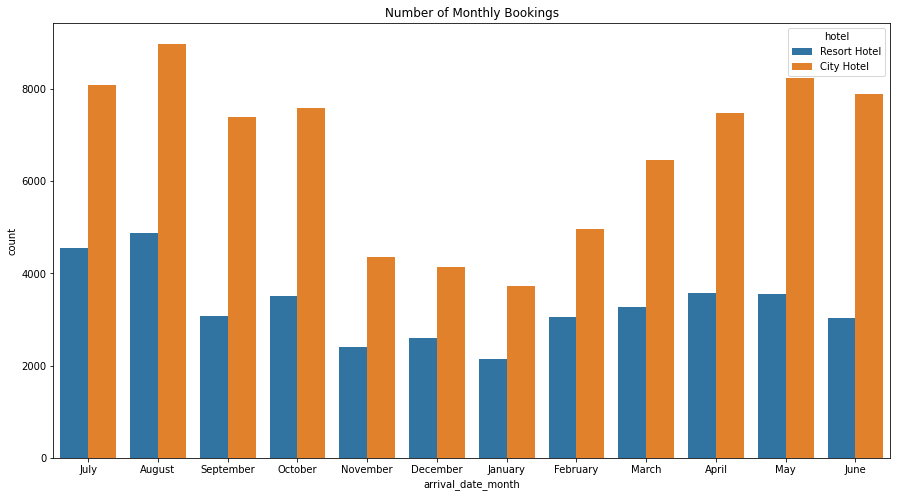

In [27]:
plt.figure(figsize=(15,8))
sns.countplot(x = df['arrival_date_month']).set_title('Number of Monthly Bookings')
plt.show()

plt.figure(figsize=(15,8))
sns.countplot(x = 'arrival_date_month',hue = 'hotel',data=df).set_title('Number of Monthly Bookings')


In [28]:
# August month has the highest number of bookings
# November,December and January has the lowest number of Bookings

In [29]:
df['arrival_date_month'].value_counts()

August       13852
July         12628
May          11779
October      11095
April        11045
June         10927
September    10467
March         9739
February      8012
November      6752
December      6728
January       5874
Name: arrival_date_month, dtype: int64

In [94]:
max_monthly_price = df[['arrival_date_month','adr']].value_counts().reset_index().max()
max_monthly_price

arrival_date_month    September
adr                      5400.0
0                           913
dtype: object

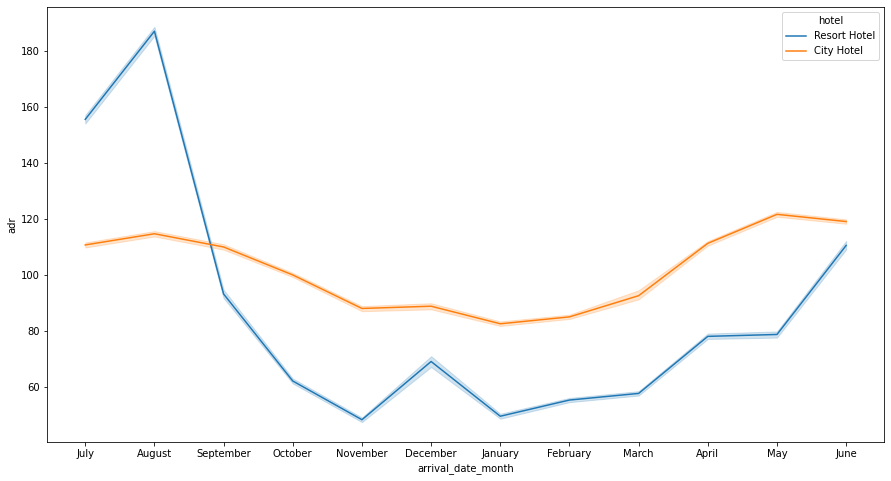

In [30]:
# Q. Which months have cheaper booking rates?
plt.figure(figsize=(15,8))
sns.lineplot(data = df,x='arrival_date_month', y='adr', hue='hotel')
plt.show()

In [31]:
# For both city and resort hotels, Nov to Jan have cheaper average daily rates 
# August is the highest priced which corelates with the number of bookings.

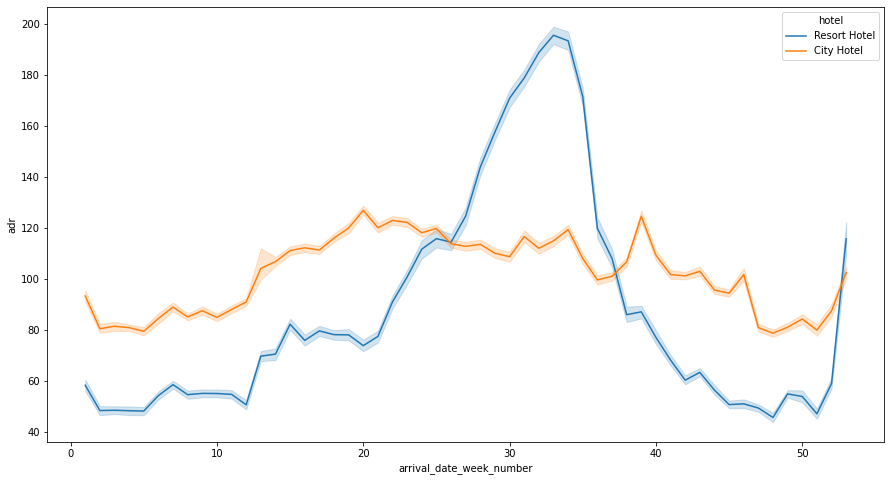

In [32]:
plt.figure(figsize=(15,8))
sns.lineplot(data = df,x='arrival_date_week_number', y='adr', hue='hotel')
plt.show()

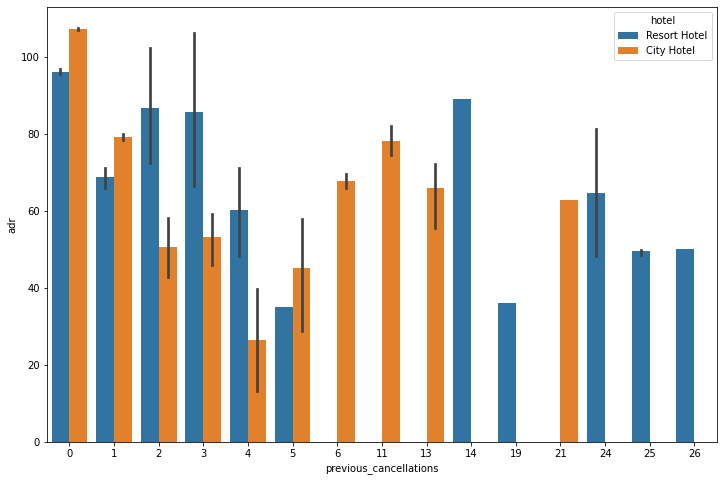

In [60]:
# Previous cancelled bookings
plt.figure(figsize=(12,8))
sns.barplot(data = df,x='previous_cancellations', y='adr', hue='hotel')
plt.show()

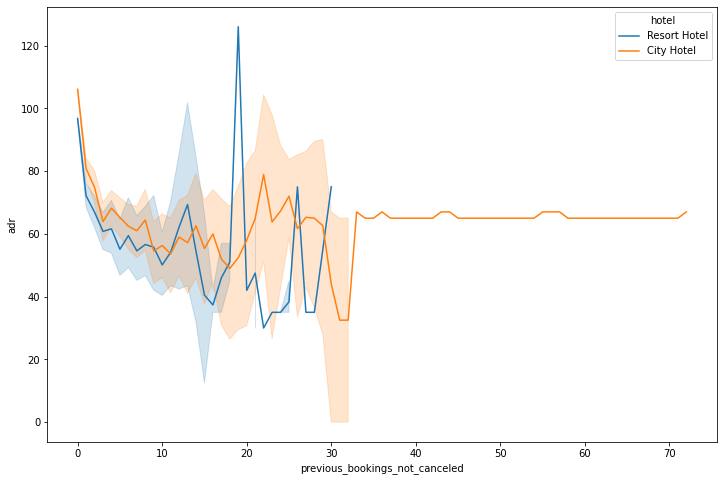

In [71]:
# Previous bookings not cancelled
plt.figure(figsize=(12,8))
sns.lineplot(data = df,x='previous_bookings_not_canceled', y='adr', hue='hotel')
plt.show()

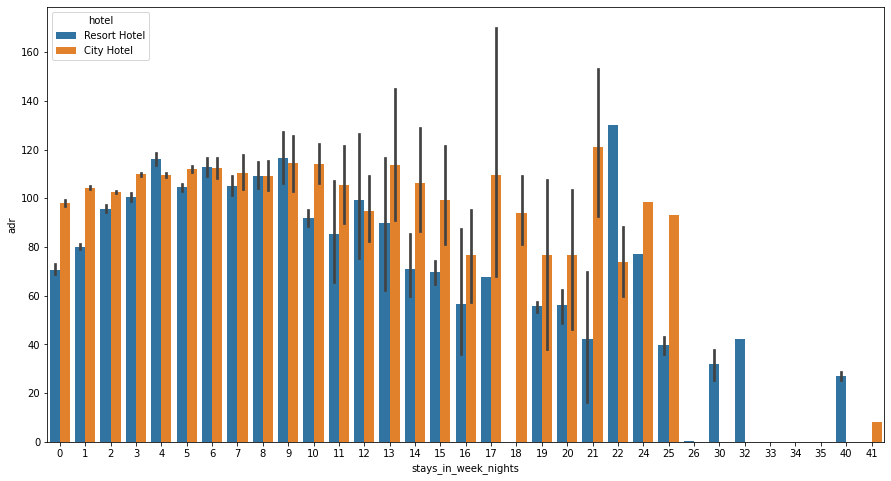

In [65]:
plt.figure(figsize=(15,8))
sns.barplot(data = df,x='stays_in_week_nights', y='adr', hue='hotel')
plt.show()

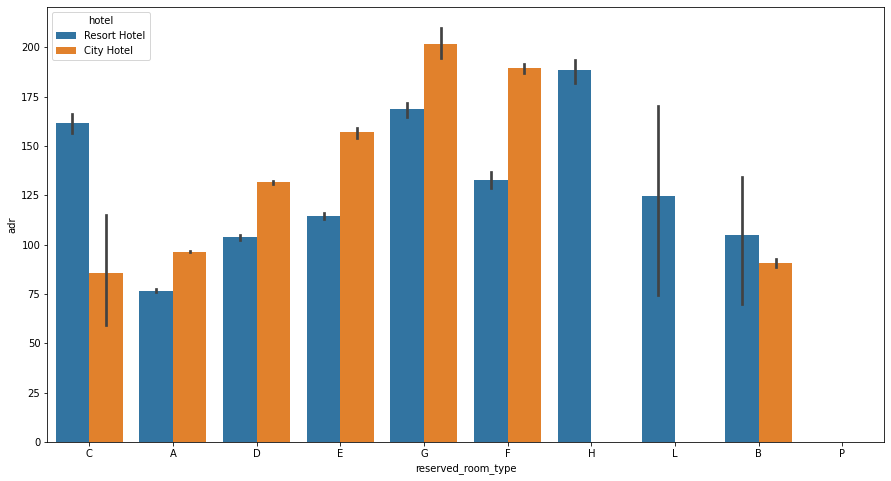

In [69]:
plt.figure(figsize=(15,8))
sns.barplot(data = df,x='reserved_room_type', y='adr', hue='hotel')
plt.show()

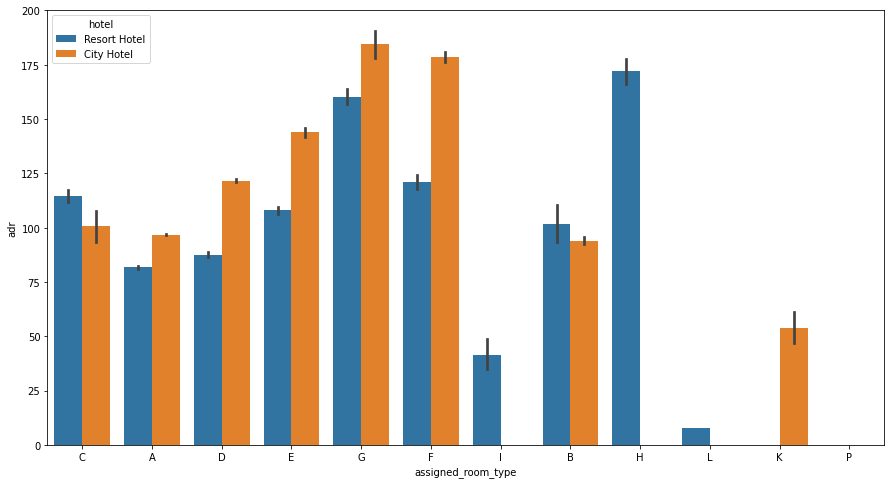

In [41]:
plt.figure(figsize=(15,8))
sns.barplot(data = df,x='assigned_room_type', y='adr', hue='hotel')
plt.show()

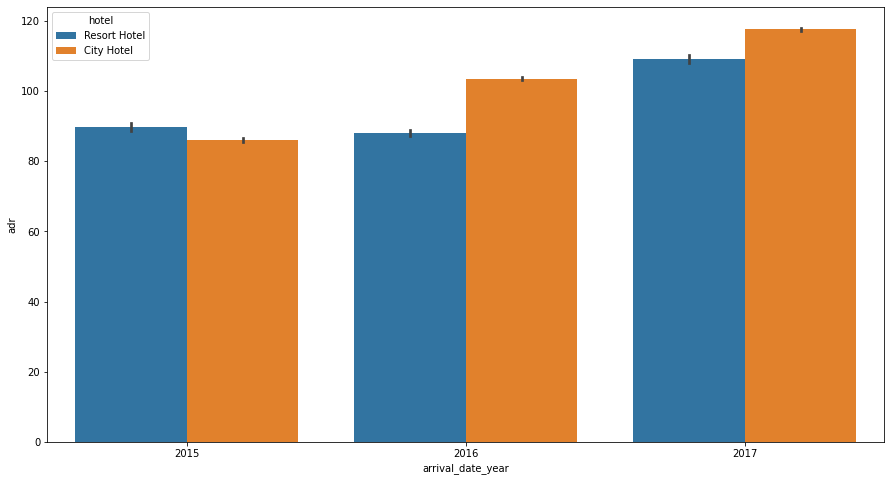

In [111]:
# Time wise price differences
plt.figure(figsize=(15,8))
sns.barplot(data = df,x='arrival_date_year', y='adr', hue='hotel')
plt.show()

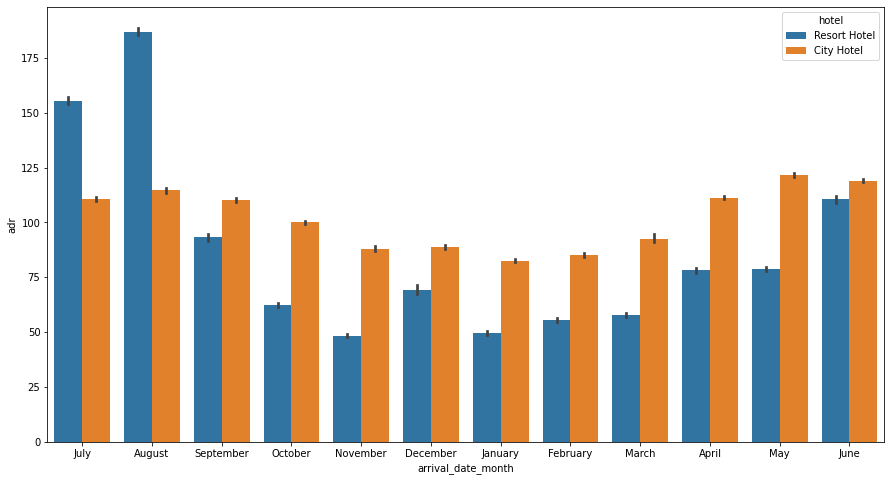

In [97]:
plt.figure(figsize=(15,8))
sns.barplot(data = df,x='arrival_date_month', y='adr', hue='hotel')
plt.show()

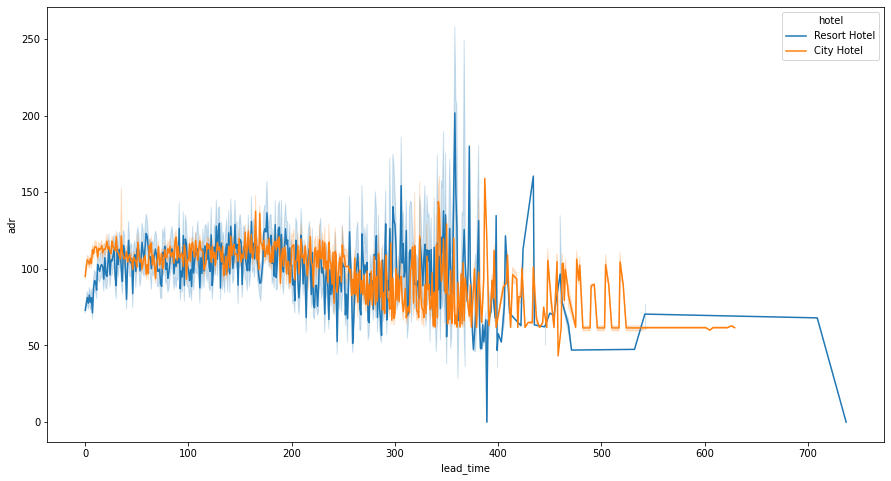

In [42]:
plt.figure(figsize=(15,8))
sns.lineplot(data = df,x='lead_time', y='adr', hue='hotel')
plt.show()

In [33]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

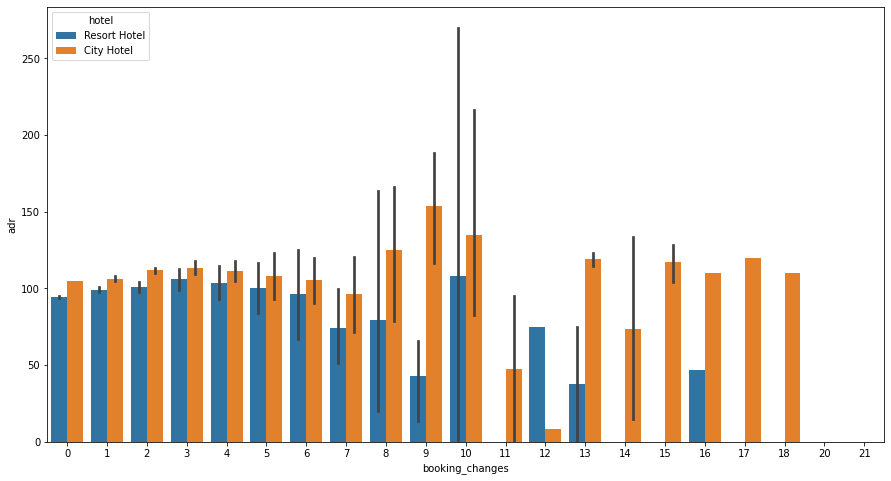

In [126]:
plt.figure(figsize=(15,8))
sns.barplot(data = df,x='booking_changes', y='adr', hue='hotel')
plt.show()

In [43]:
# Checking Market segments 
df['market_segment'].value_counts()

Online TA        56402
Offline TA/TO    24160
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: market_segment, dtype: int64

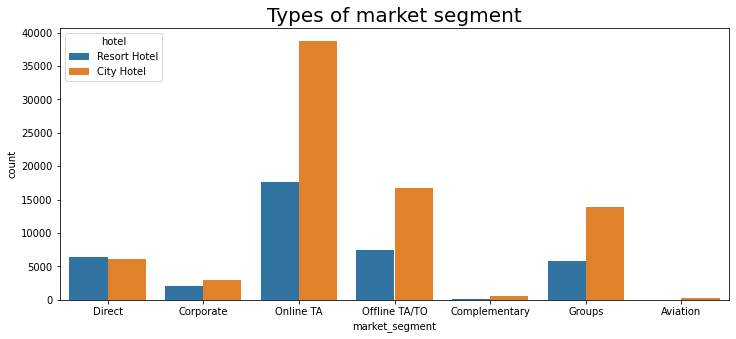

Text(0.5, 1.0, 'Market Segment')

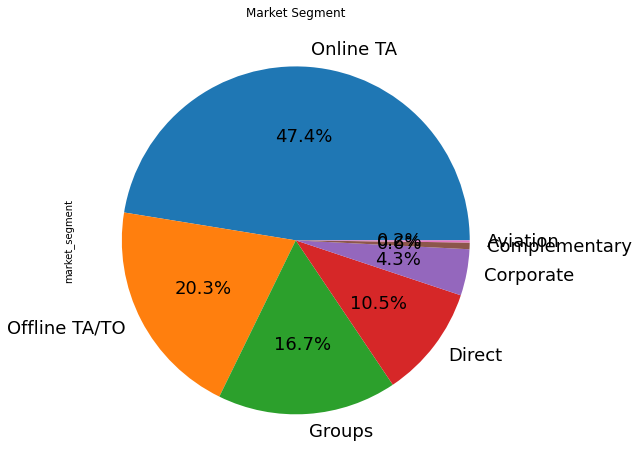

In [128]:
plt.figure(figsize=(12,5))
sns.countplot(data = df, x = 'market_segment',hue='hotel').set_title('Types of market segment', fontsize = 20)
plt.show()
percent = df["market_segment"].value_counts()
percent.plot.pie(fontsize= 18,autopct="%.1f%%",figsize=(10,8),textprops={'fontsize': 20})
plt.title('Market Segment')


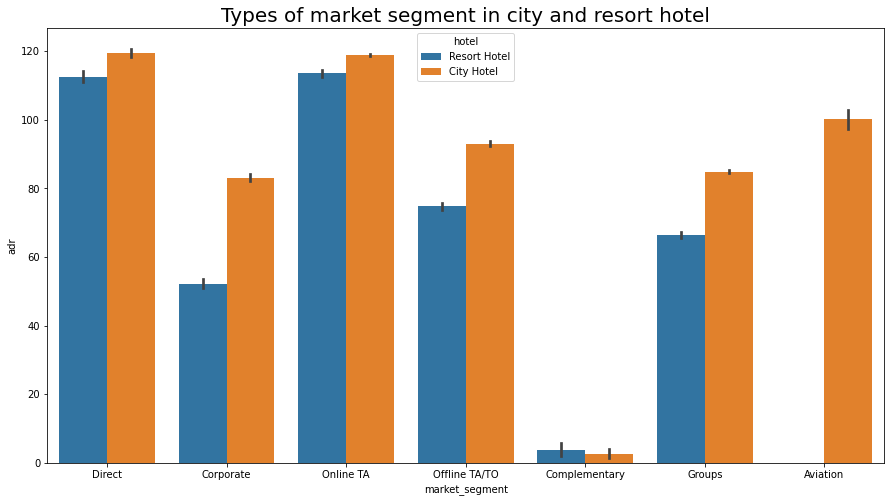

In [63]:
plt.figure(figsize=(15,8))
sns.barplot(data = df,x='market_segment', y='adr', hue='hotel').set_title('Types of market segment in city and resort hotel', fontsize = 20)
plt.show()

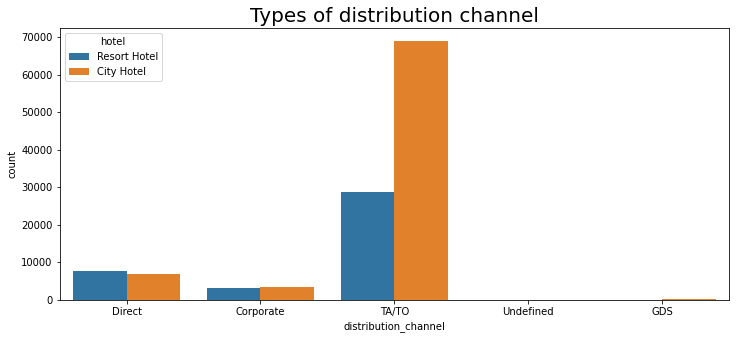

Text(0.5, 1.0, 'Distribution channel')

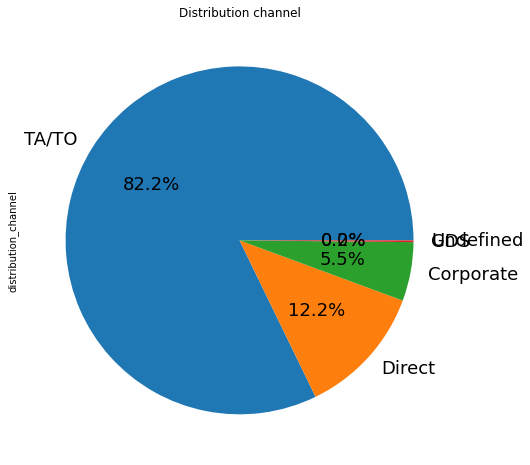

In [129]:
# Distribution channel
plt.figure(figsize=(12,5))
sns.countplot(data = df, x = 'distribution_channel',hue='hotel').set_title('Types of distribution channel', fontsize = 20)
plt.show()
percent = df["distribution_channel"].value_counts()
percent.plot.pie(fontsize= 18,autopct="%.1f%%",figsize=(10,8),textprops={'fontsize': 20})
plt.title('Distribution channel')

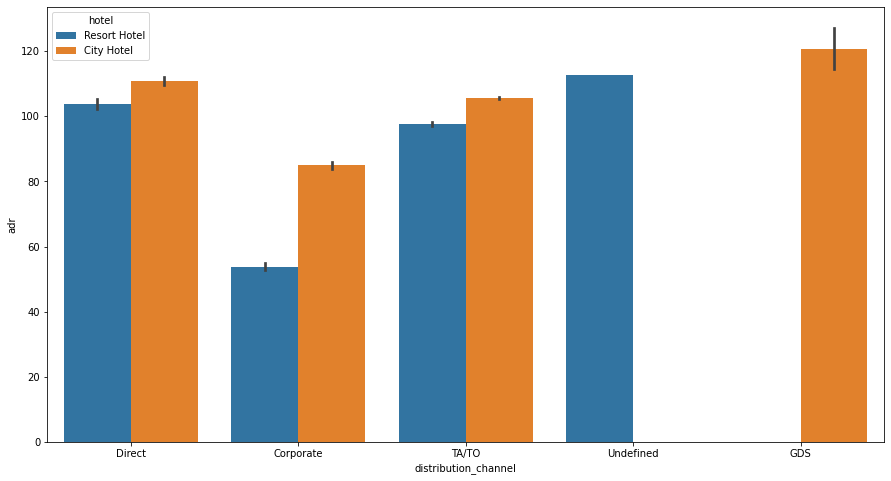

In [68]:
plt.figure(figsize=(15,8))
sns.barplot(data = df,x='distribution_channel', y='adr', hue='hotel')
plt.show()

In [46]:
# Frow above we see that the majority of the distribution channels and market segments involve travel agencies (online or offline).
# We can target our marketing area to be on these travel agencies website and work with them since majority of the visitors tend to reach out to them.

In [47]:
# Checking countries
countries = df['country'].value_counts()[:10]
countries

PRT    48586
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: country, dtype: int64

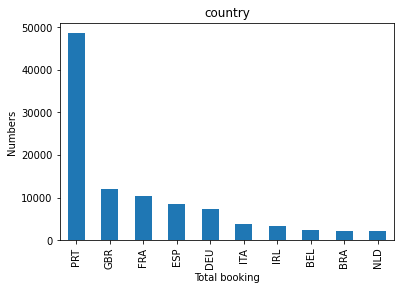

In [130]:
df["country"].value_counts()[:10].plot.bar()
plt.xlabel("Total booking")
plt.ylabel("Numbers")
plt.title("country")
plt.show()

In [49]:
# we have highest number of visitors from Europe namely Portugal(PRT),United kingdom(GBR),France(FRA),Spain(ESP).

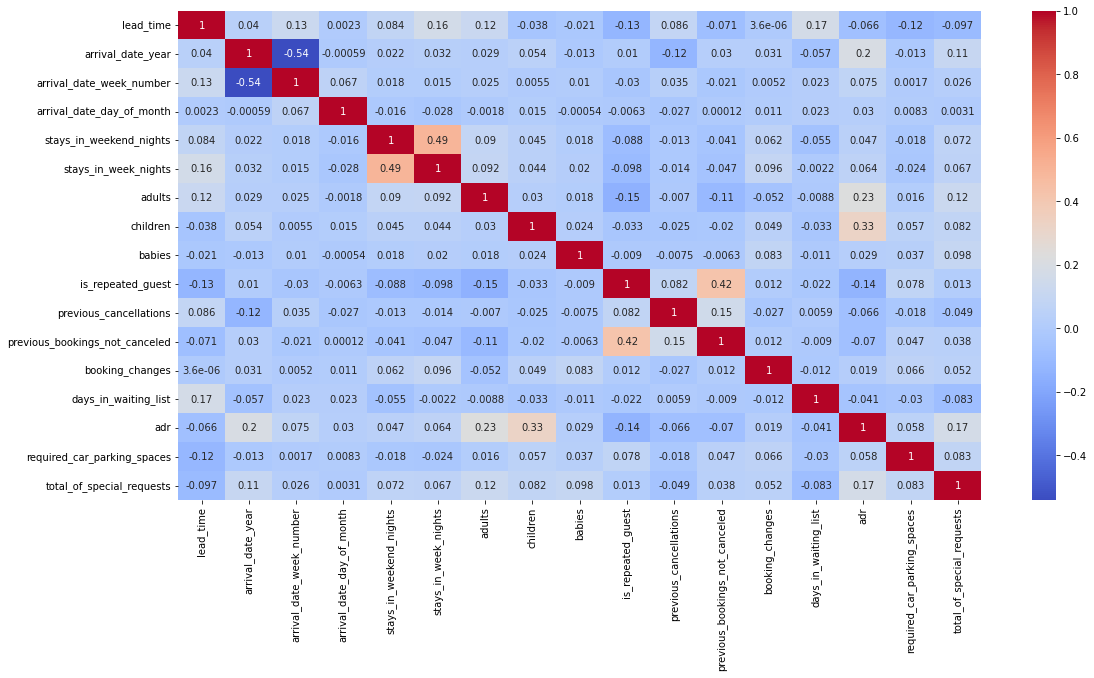

In [50]:
# Checking the Correlation 
corr_df = df.corr()
plt.figure(figsize=(18,9))
sns.heatmap(corr_df,cmap='coolwarm',annot=True)

In [51]:
# ADR and total people are highly correlated. That means more the people more will be adr.High adr means high revenue.
# same room as per reserved room is not the reason for booking cancellations.
# lead-time and total stay is positively correlated means more is the stay of customer more will be the lead time.
# is_repeated_guest and previous_bookings_not_canceled has strong correlation. May be repeated guests are not more likely to cancel their bookings.
# stays_in_week_weekend_nights and stays_in_week_nights has strong correlation.

##Conclusion:
1.  The majority of the people preferred City hotel over Resort hotel.
2.  City hotels have the highest cancellation rates, this can be verified by the fact that city hotels have higher booking rate than resort hotels.
3.  2016 has more number of bookings than 2015 and 2017. After 2015 bookings increased in 2016 but then decreased in 2017.
4.  From above we can see that month ending has the least number of arrivals in both resort and city hotels.
5.  August month has the highest number of bookings.Month of November, December and January has the lowest number of Bookings.
6.  For both city and resort hotels, Nov to Jan have cheaper average daily rates.
7.  Frow above we see that the majority of the distribution channels and market segments involve travel agencies (online or offline). We can target our marketing area to be on these travel agencies website and work with them since majority of the visitors tend to reach out to them.
8.  The highest number of visitors are from Europe namely Portugal(PRT),United kingdom(GBR),France(FRA) and Spain(ESP).
  
  